In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Fixed parameters
Omega = 2*np.pi/86400
R = 3486e3
rho = 13e3
U0 = 8.7e-5

# Trade off plot for a single value of the Hurst exponent

In [33]:
# Characteristic length scale
lambda0 = 400e3
k0 = 2*np.pi/lambda0

In [50]:
N_array = np.array([5, 10, 20]) # B.V. frequency
H = 0.6

In [51]:
d = np.linspace(1,min(200e3,2*lambda0),500)

In [52]:
hrms = np.zeros((len(N_array), len(d)))
for i, N in enumerate (N_array):
    hrms[i] = np.sqrt( (2**(7+4*H) * d * (d*k0)**(-2*H) * np.pi**(2*H-1) * (2*H-1)) / (17 * R**2 * U0**2 * H * rho * Omega * np.sqrt(N**2-1)) ) * np.sqrt(1e7)


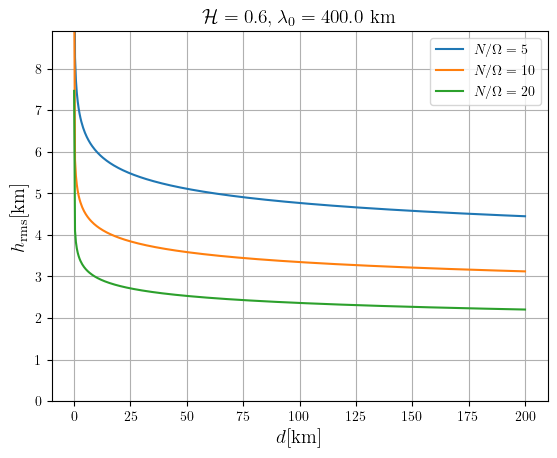

In [53]:
plt.rc('text', usetex=True)
Hidx = 1
for i in range(hrms.shape[0]):
    plt.plot(d/1e3, hrms[i]/1e3, label=fr'$N/\Omega = {N_array[i]}$')
plt.ylim(0,2*hrms[0,-1]/1e3)
plt.ylabel(r'$h_\mathrm{rms} [\mathrm{km}]$', fontsize=14)
plt.xlabel(r'$d [\mathrm{km}]$', fontsize=14)
plt.grid()
plt.legend()
plt.title(rf'$\mathcal{{H}} = {H}, \lambda_0 = {lambda0/1e3}~\mathrm{{km}}$', fontsize=14)
#plt.savefig("Diss.pdf")
plt.show()

# Trade off plots varying the Hurst exponent

In [39]:
N_array = np.array([1.1, 1.5, 2]) # B.V. frequency
H_array = np.array([0.6,0.7,0.8]) # Hurst exponent

lambda_array = np.array([50e3,100e3,200e3]) # horizontal wavelength

In [40]:
#lambda0 = 100e3
#k0 = 2*np.pi/lambda0
Omega = 2*np.pi/86400
R = 3486e3
rho = 13e3
U0 = 8.7e-5

In [41]:
def hrms(N,H,lambda0):
    #d = np.linspace(1,min(200e3,2*lambda0),500)
    d = np.linspace(1,2*lambda0,500)
    k0 = 2*np.pi/lambda0
    return d, np.sqrt( (2**(7+4*H) * d * (d*k0)**(-2*H) * np.pi**(2*H-1) * (2*H-1)) / (17 * R**2 * U0**2 * H * rho * Omega * np.sqrt(N**2-1)) ) * np.sqrt(1e7)
    

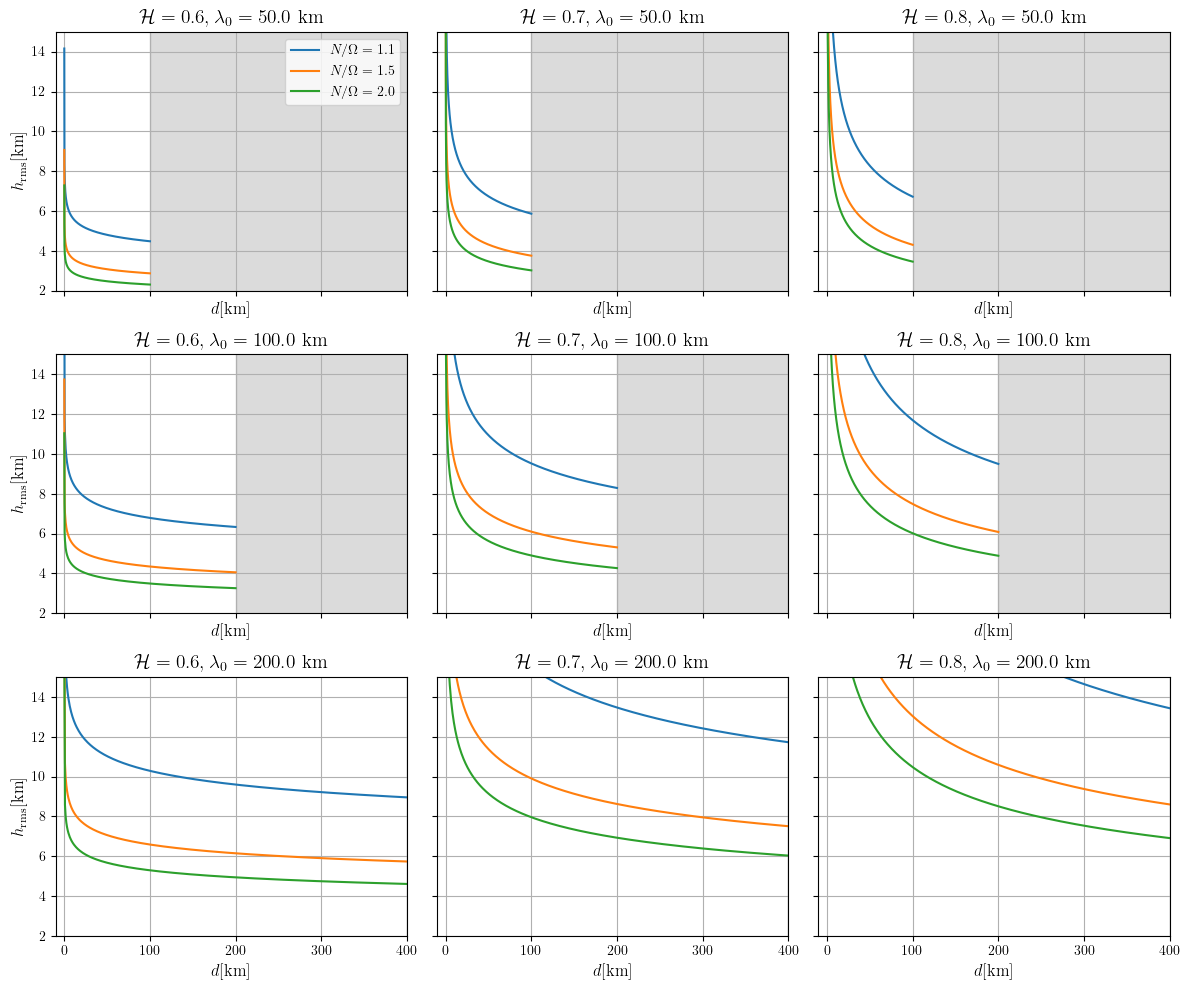

In [45]:
plt.rc('text', usetex=True)
fig, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)  # Adjust figsize as needed

axes[0,0].set_ylim(2, 15)
axes[0,0].set_xlim(-10, 400)

for k, lambda0 in enumerate(lambda_array):
    axes[k,0].set_ylabel(r'$h_\mathrm{rms} [\mathrm{km}]$', fontsize=12)
    for j, H in enumerate(H_array):
        ax = axes[k,j]  # Select the current subplot
        for i, N in enumerate(N_array):
            d, h = hrms(N, H, lambda0)
            ax.plot(d/1e3, h/1e3, label=fr'$N/\Omega = {N_array[i]}$')
            ax.fill_betweenx(d, 2*lambda0/1e3,400, color='gray', alpha=0.1)
            
        ax.set_xlabel(r'$d [\mathrm{km}]$', fontsize=12)
        ax.grid()
        
        # Add a title to each subplot
        ax.set_title(fr'$\mathcal{{H}} = {H}, \lambda_0 = {lambda_array[k]/1e3}~\mathrm{{km}}$', fontsize=14)

axes[0,0].legend()

# Adjust layout
plt.tight_layout()

#plt.savefig("Diss.pdf")
plt.show()